# Отчет выполнения практической работы 9

In [ ]:
# Основные понятия: случайная величина, наблюдение, генеральная 
# совокупность и выборка Примеры

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
%matplotlib inline

In [2]:
# Выборочное среднее, истинное среднее. Примеры. Как среднее реагирует 
# на выбросы?
# Медиана. Синтаксис. Примеры. Как медиана реагирует на выбросы?
# Мода. Пример.
# Квартили. Эксклюзивный метод подсчета квартилей. Примеры

In [2]:
myData=pd.Series([4,11,12,20,23,23,30,31,32,33,34,36,
38,40,41,44,44,44,45,47,48,49,54,56])

mean = myData.mean() # Среднее значение
var = myData.var() # Дисперсия
std = myData.std()# Стандартное отклонение
mode = myData.mode()# Мода – наиболее частое наблюдение
median = myData.median()# Медиана (Q2)
perc25 = myData.quantile(0.25, interpolation='linear') # Q1
perc75 = myData.quantile(0.75, interpolation='linear') # Q3
IQR = perc75 - perc25
hesh = [mean, var, std, mode, median, IQR,perc25, perc75]
print(hesh)
pprint(hesh, width=140, compact=False)

[34.958333333333336, 189.51992753623188, 13.766623679618466, 0    44
dtype: int64, 37.0, 16.0, 28.25, 44.25]
[34.958333333333336, 189.51992753623188, 13.766623679618466, 0    44
dtype: int64, 37.0, 16.0, 28.25, 44.25]


In [3]:
myData2=[]
for g in myData:
    if g>=perc25-1.5*IQR and g<=perc75+1.5*IQR:
        myData2.append(g)

myData2=pd.Series(myData2, dtype='Int64')
print(myData2)

0     11
1     12
2     20
3     23
4     23
5     30
6     31
7     32
8     33
9     34
10    36
11    38
12    40
13    41
14    44
15    44
16    44
17    45
18    47
19    48
20    49
21    54
22    56
dtype: Int64


In [5]:
mean2 = myData2.mean() # Среднее значение
var2 = myData2.var() # Дисперсия
std2 = myData2.std()# Стандартное отклонение
mode2 = myData2.mode()# Мода – наиболее частое наблюдение
median2 = myData2.median()# Медиана (Q2)
hesh2 = [mean2, var2, std2, mode2, median2, IQR,perc25, perc75]
print(hesh2)

[36.30434782608695, 152.67588932806325, 12.3562085336912, 0    44
dtype: Int64, 38.0, 16.0, 28.25, 44.25]


In [6]:
# Меры разброса: межквартильный размах. Примеры.
# Меры разброса: стандартное отклонение. Примеры
# Метод plot. Настройка параметров метода. Характеристики графика 
# Постройте графики и опишите их характеристики
# Ко всему датафрейму Гистограмма распределения признака
# к одному столбцу

In [4]:
df = pd.read_csv('tips.csv')
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes:title={'center':'Общая сумма счета'}, ylabel='Frequency'>

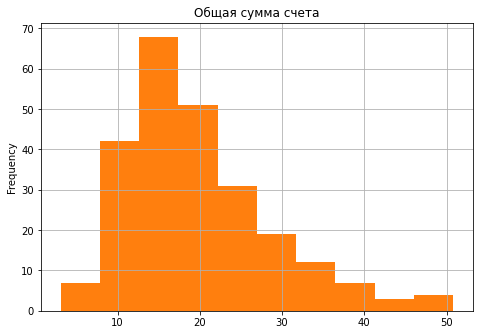

In [5]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.hist(df['total_bill'])

df['total_bill'].plot(kind='hist',grid=True,
title='Общая сумма счета')

<AxesSubplot:title={'center':'Каждый день как день рождения'}>

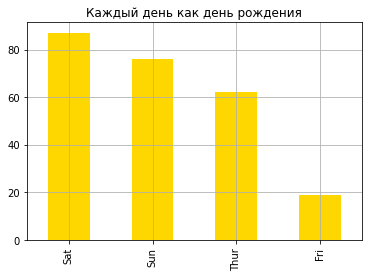

In [9]:
df['day'].value_counts().plot(kind='bar', grid=True,
              color='gold',title='Каждый день как день рождения')

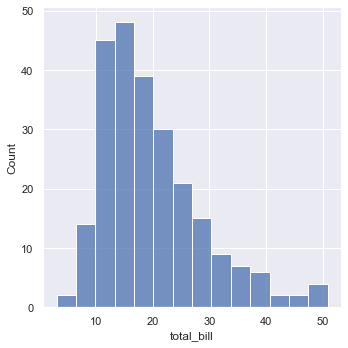

In [6]:
import seaborn as sns

sns.set()
sns.displot(df['total_bill'])


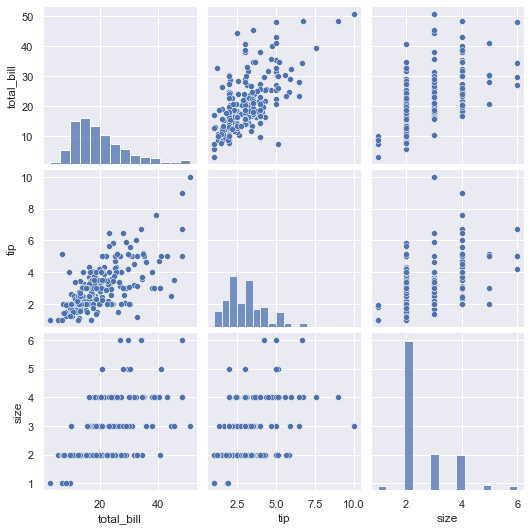

In [7]:
sns.pairplot(df)

In [12]:
# Метод plot с категориальными (нечисловыми) переменными
# Постройте графики и опишите их характеристики
# Отображение двух показателей на графике.
# Постройте графики и опишите их характеристики

In [13]:
# Библиотека Matplotlib модуль pyplot . Методы axes() и hist()
# Форматирование графика: заголовок диаграммы, подписи осей, легенда.
# Постройте графики и опишите их характеристики

In [14]:
# Графическая библиотека Seaborn
# Метод distplot(). Синтаксис. Пример
# Описание
# Метод countplot().Синтаксис. Пример

In [15]:
# Описание
# Метод boxplots().Синтаксис. Пример
# Описание
# Метод heatmap(). Синтаксис. Пример
# Описание

In [16]:
# Пример задания. Отобразить информацию, чтобы увидеть, как изменялось 
# распределение сумм чаевых в разные дни недели в зонах для курящих и 
# некурящих гостей ресторана.

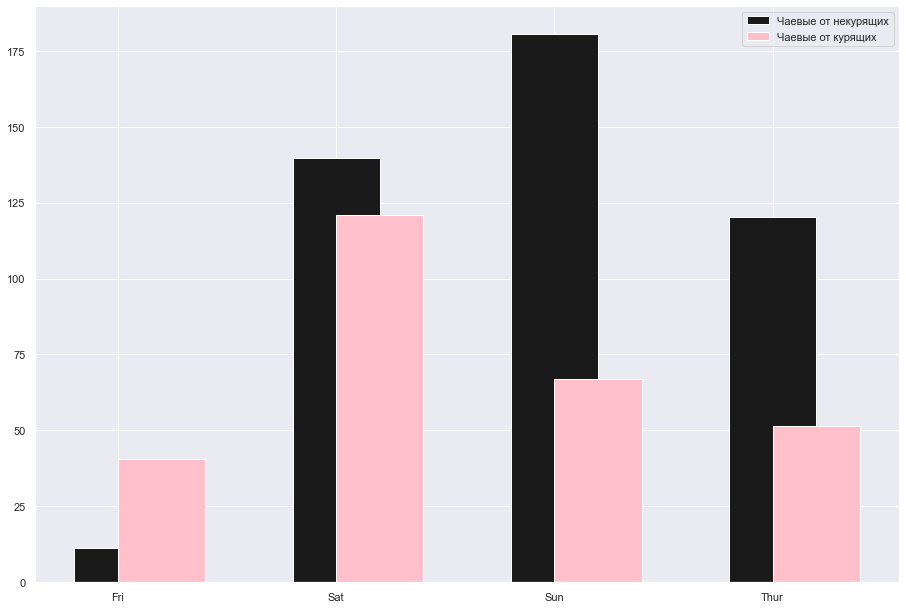

In [46]:
from collections import deque
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv('tips.csv')
bills_per_day = df['day'].value_counts() # посчитали кол-во дней
bills_per_day['day']=bills_per_day.index
days = deque(bills_per_day['day']) # передвинули начало недели на 1 день назад
days.rotate(1)

tip_no_smoke = df.groupby('smoker').get_group('No') # создали датаФрейм для некурящих
tip_smoke = df.groupby('smoker').get_group('Yes') # то же для курящих

nosmokers = tip_no_smoke.groupby('day').agg({'tip':'sum'}) # Расфасовали суммы чаевых по дням недели для не курящих 
smokers = tip_smoke.groupby('day').agg({'tip':'sum'}) #то же
bills_per_day['nosmokers'] = nosmokers['tip'] 
bills_per_day['smokers'] = smokers['tip']

fig = plt.figure()
axes = fig.add_axes([0,0,2,2])
axes.bar(x= days,                     # Форма графика по х = дни недели, y= сумма чаевых
height=bills_per_day['nosmokers'],
width = 0.4,
align = 'center',
color = 'k',
label='Чаевые от некурящих')
axes.bar(x= days,
height=bills_per_day['smokers'],
width = 0.4,
align = 'edge',
color = 'pink',
label='Чаевые от курящих')
axes.legend(loc=0)

In [25]:
nosmokers, smokers

(         tip
 day         
 Fri    11.25
 Sat   139.63
 Sun   180.57
 Thur  120.32,
          tip
 day         
 Fri    40.71
 Sat   120.77
 Sun    66.82
 Thur   51.51)

In [55]:
bills_per_day

Sun                                                         76
Sat                                                         87
Thur                                                        62
Fri                                                         19
day          Index(['Sun', 'Sat', 'Thur', 'Fri'], dtype='ob...
nosmokers    day
Sun     180.57
Sat     139.63
Thur    120....
smokers      day
Fri      40.71
Sat     120.77
Sun      66....
Name: day, dtype: object